<a href="https://colab.research.google.com/github/Photodacapa/IA_CHATBOT/blob/main/Manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q -U google-generativeai

In [8]:
import google.generativeai as genai
from google.colab import userdata

API_KEY = userdata.get ("API_KEY") #Não deixe a segurança de segurança visivel
genai.configure(api_key=API_KEY)

In [4]:
generation_config = {
   "candidate_count": 1,
   "temperature": 0.5,
}

É possível ajustar as configurações de segurança em quatro dimensões para avaliar rapidamente se o aplicativo exige uma configuração mais ou menos restritiva.

Conforme a necessidade do projeto

In [5]:
safety_settings = {
    "Harassment": "Block_only_high",  #Bloquear quando houver alta probabilidade de conteúdo não seguro
    "Hate": "Block_medium_and_above", #Bloquear quando houver média ou alta probabilidade de conteúdo não seguro
    "Sexual": "Block_low_and_above",  #Bloquear quando a probabilidade de conteúdo não seguro é baixa, média ou alta
    "Dangerous": "Block_only_high",   #Bloquear quando houver alta probabilidade de conteúdo não seguro
}

In [15]:
model = genai.GenerativeModel(model_name="gemini-1.0-pro",
                             generation_config=generation_config,
                             safety_settings=safety_settings)

In [16]:
response = model.generate_content("Crie uma lista com bebidas e comidas com a quantidade de cada item para uma festa de casamento com 150 convidados") #Verificou se o model foi declarado de forma correta
print (response.text)

**Bebidas**

* Cerveja: 500 litros
* Vinho tinto: 200 garrafas
* Vinho branco: 150 garrafas
* Refrigerantes: 500 litros
* Água: 1000 litros
* Sucos: 200 litros
* Coquetéis: 100 litros

**Comidas**

**Aperitivos**

* Canapés: 300 unidades
* Bruschettas: 250 unidades
* Mini quiches: 200 unidades
* Tábua de frios: 500 fatias

**Pratos Principais**

* Filé mignon com batatas gratinadas: 150 porções
* Salmão grelhado com arroz de amêndoas: 150 porções
* Lasanha à bolonhesa: 150 porções

**Acompanhamentos**

* Salada verde: 150 porções
* Salada de batata: 150 porções
* Legumes assados: 150 porções

**Sobremesas**

* Bolo de casamento: 150 fatias
* Docinhos finos: 300 unidades
* Frutas da estação: 150 porções


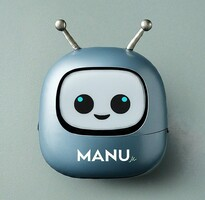

In [13]:
from IPython.display import Image #Necessário adicionar a imagem no colab
Image('/content/Gemini_Generated_Image_kp41dfkp41dfkp41 (1).jpg') #imagem gerada pelo Gemini

In [17]:
chat = model.start_chat (history=[])

In [19]:
nome = input("Como você prefere que eu te chame? ")

print("\n")
print("Olá!",nome,"meu nome é","\033[1m" + "Manu" + "\033[0m", "assistente virtual da","\033[1m" + "M.Eventos 🎉🥳" + "\033[0m","\n") #comando "\033[1m" "\033[0m" foi usado para colocar palavras em negrito
print("Por aqui vou te ajudar com sugestões de comida e bebidas para a sua festa:❤️", "\n", "\n")
print("Prepare-se para algumas dicas incríveis de como fazer suas perguntas da melhor maneira!", "\n", "\n")#

#Texto reescrito pelo Gemini
lista_exemplos = ["Para minha festa temática mexicana com 30 convidados, gostaria de saber a quantidade ideal de bebidas e comidas.",
                  "Para o meu casamento, que terá 50 convidados, gostaria de saber a quantidade ideal de bebidas e comidas."]

print ("\033[1m" + "1 -" + "\033[0m",lista_exemplos[0])
print ("\033[1m" + "2 -" + "\033[0m",lista_exemplos[1],"\n")


prompt = input("Me passe as informações da sua festa: ").lower() # A função lower(), que converte todas as letras de uma string em minúsculas.

#O código abaixo não será apresentado ao usuário, o mesmo está sendo usuado para melhor orientar na resposta da IA.
response = chat.send_message("Para me ajudar a planejar as compras para a festa, preciso criar uma lista com a quantidade de itens que devo comprar. Você poderia me ajudar com isso? Você também pode me parabenizar pelo evento")

while prompt != "fim":
    print("\n")
    response = chat.send_message(prompt)
    print ("Tudo pronto aqui está sua lista📋" ,response.text,"\n")
    prompt = input("Se tiver mais dúvidas, me manda um toque!😎 Pra finalizar, só escrever Fim: ").lower() # A função lower(), que converte todas as letras de uma string em minúsculas.


Como você prefere que eu te chame? Roberto


Olá! Roberto meu nome é Manu assistente virtual da M.Eventos 🎉🥳 

Por aqui vou te ajudar com sugestões de comida e bebidas para a sua festa:❤️ 
 

Prepare-se para algumas dicas incríveis de como fazer suas perguntas da melhor maneira! 
 

1 - Para minha festa temática mexicana com 30 convidados, gostaria de saber a quantidade ideal de bebidas e comidas.
2 - Para o meu casamento, que terá 50 convidados, gostaria de saber a quantidade ideal de bebidas e comidas. 

Me passe as informações da sua festa: ara o meu casamento, que terá 50 convidados, gostaria de saber a quantidade ideal de bebidas e comidas


Tudo pronto aqui está sua lista📋 **Quantidades ideais de bebidas e comidas para um casamento com 50 convidados:**

**Bebidas:**

* Água: 50 garrafas
* Refrigerantes: 100 latas
* Cerveja: 150 latas
* Vinho: 12 garrafas

**Comida:**

* Salgadinhos: 500 peças
* Sanduíches: 50 unidades
* Bolo: 50 fatias
* Frutas: 50 porções

**Sobremesas:**

* Doc

In [20]:
#Melhorando a visualização
#Código disponível em https://ai.google/dev/tutorials/python/quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))
  print('-'*100)

> **user**: Para me ajudar a planejar as compras para a festa, preciso criar uma lista com a quantidade de itens que devo comprar. Você poderia me ajudar com isso? Você também pode me parabenizar pelo evento

----------------------------------------------------------------------------------------------------


> **model**: **Parabéns pelo seu evento!** Que seja um momento especial e inesquecível.
> 
> Para ajudá-lo a planejar as compras, criei uma lista de itens essenciais e suas quantidades recomendadas:
> 
> **Bebidas:**
> 
> * Água: 1 garrafa por pessoa
> * Refrigerantes: 2 latas por pessoa
> * Cerveja: 3 latas por pessoa
> * Vinho: 1 garrafa para cada 4 pessoas
> 
> **Comida:**
> 
> * Salgadinhos: 10 peças por pessoa
> * Sanduíches: 1 por pessoa
> * Bolo: 1 fatia por pessoa
> * Frutas: 1 porção por pessoa
> 
> **Sobremesas:**
> 
> * Docinhos: 5 peças por pessoa
> * Sorvete: 1 bola por pessoa
> 
> **Outros itens:**
> 
> * Pratos: 1 por pessoa
> * Copos: 2 por pessoa
> * Guardanapos: 10 por pessoa
> * Gelo: 1 saco grande
> * Sacos de lixo: 5
> 
> **Quantidades adicionais para eventos maiores:**
> 
> * Para eventos com mais de 50 pessoas, aumente as quantidades em 20%.
> * Para eventos com mais de 100 pessoas, aumente as quantidades em 50%.
> 
> **Dicas:**
> 
> * Compre bebidas e comida com antecedência para evitar preços mais altos.
> * Considere alugar pratos, copos e talheres para economizar na limpeza.
> * Prepare alguns itens caseiros, como salgadinhos ou sobremesas, para economizar custos.
> * Peça ajuda a amigos ou familiares para preparar e servir a comida.
> 
> Esta lista é um ponto de partida, então ajuste as quantidades conforme necessário com base no número de convidados, preferências e orçamento.

----------------------------------------------------------------------------------------------------


> **user**: festa de casamento para 50 pessoas 

----------------------------------------------------------------------------------------------------


> **model**: **Lista de compras para festa de casamento para 50 pessoas:**
> 
> **Bebidas:**
> 
> * Água: 50 garrafas
> * Refrigerantes: 100 latas
> * Cerveja: 150 latas
> * Vinho: 12 garrafas
> 
> **Comida:**
> 
> * Salgadinhos: 500 peças
> * Sanduíches: 50 unidades
> * Bolo: 50 fatias
> * Frutas: 50 porções
> 
> **Sobremesas:**
> 
> * Docinhos: 250 peças
> * Sorvete: 50 bolas
> 
> **Outros itens:**
> 
> * Pratos: 50 unidades
> * Copos: 100 unidades
> * Guardanapos: 500 unidades
> * Gelo: 2 sacos grandes
> * Sacos de lixo: 10 unidades
> 
> **Quantidades adicionais:**
> 
> * Aumente as quantidades em 20% para um total de 60 pessoas.
> 
> **Dicas:**
> 
> * Compre bebidas e comida com antecedência para evitar preços mais altos.
> * Considere alugar pratos, copos e talheres para economizar na limpeza.
> * Prepare alguns itens caseiros, como salgadinhos ou sobremesas, para economizar custos.
> * Peça ajuda a amigos ou familiares para preparar e servir a comida.
> * Considere contratar um serviço de bufê ou catering para facilitar o processo.
> 
> Esta lista é um ponto de partida, então ajuste as quantidades conforme necessário com base nas preferências e orçamento. Parabéns pelo seu casamento!

----------------------------------------------------------------------------------------------------


> **user**: Para me ajudar a planejar as compras para a festa, preciso criar uma lista com a quantidade de itens que devo comprar. Você poderia me ajudar com isso? Você também pode me parabenizar pelo evento

----------------------------------------------------------------------------------------------------


> **model**: **Parabéns pelo seu evento!** Que seja um momento especial e inesquecível.
> 
> Para ajudá-lo a planejar as compras, criei uma lista de itens essenciais e suas quantidades recomendadas:
> 
> **Bebidas:**
> 
> * Água: 1 garrafa por pessoa
> * Refrigerantes: 2 latas por pessoa
> * Cerveja: 3 latas por pessoa
> * Vinho: 1 garrafa para cada 4 pessoas
> 
> **Comida:**
> 
> * Salgadinhos: 10 peças por pessoa
> * Sanduíches: 1 por pessoa
> * Bolo: 1 fatia por pessoa
> * Frutas: 1 porção por pessoa
> 
> **Sobremesas:**
> 
> * Docinhos: 5 peças por pessoa
> * Sorvete: 1 bola por pessoa
> 
> **Outros itens:**
> 
> * Pratos: 1 por pessoa
> * Copos: 2 por pessoa
> * Guardanapos: 10 por pessoa
> * Gelo: 1 saco grande
> * Sacos de lixo: 5
> 
> **Quantidades adicionais para eventos maiores:**
> 
> * Para eventos com mais de 50 pessoas, aumente as quantidades em 20%.
> * Para eventos com mais de 100 pessoas, aumente as quantidades em 50%.
> 
> **Dicas:**
> 
> * Compre bebidas e comida com antecedência para evitar preços mais altos.
> * Considere alugar pratos, copos e talheres para economizar na limpeza.
> * Prepare alguns itens caseiros, como salgadinhos ou sobremesas, para economizar custos.
> * Peça ajuda a amigos ou familiares para preparar e servir a comida.
> 
> Esta lista é um ponto de partida, então ajuste as quantidades conforme necessário com base no número de convidados, preferências e orçamento.

----------------------------------------------------------------------------------------------------


> **user**: ara o meu casamento, que terá 50 convidados, gostaria de saber a quantidade ideal de bebidas e comidas

----------------------------------------------------------------------------------------------------


> **model**: **Quantidades ideais de bebidas e comidas para um casamento com 50 convidados:**
> 
> **Bebidas:**
> 
> * Água: 50 garrafas
> * Refrigerantes: 100 latas
> * Cerveja: 150 latas
> * Vinho: 12 garrafas
> 
> **Comida:**
> 
> * Salgadinhos: 500 peças
> * Sanduíches: 50 unidades
> * Bolo: 50 fatias
> * Frutas: 50 porções
> 
> **Sobremesas:**
> 
> * Docinhos: 250 peças
> * Sorvete: 50 bolas
> 
> **Outros itens:**
> 
> * Pratos: 50 unidades
> * Copos: 100 unidades
> * Guardanapos: 500 unidades
> * Gelo: 2 sacos grandes
> * Sacos de lixo: 10 unidades
> 
> **Dicas:**
> 
> * Compre bebidas e comida com antecedência para evitar preços mais altos.
> * Considere alugar pratos, copos e talheres para economizar na limpeza.
> * Prepare alguns itens caseiros, como salgadinhos ou sobremesas, para economizar custos.
> * Peça ajuda a amigos ou familiares para preparar e servir a comida.
> * Considere contratar um serviço de bufê ou catering para facilitar o processo.
> 
> Estas quantidades são uma estimativa e podem ser ajustadas com base nas preferências e orçamento do casal. Por exemplo, se os noivos esperam que seus convidados bebam mais cerveja do que vinho, eles podem aumentar a quantidade de cerveja e diminuir a quantidade de vinho.
> 
> Parabéns pelo casamento!

----------------------------------------------------------------------------------------------------


> **user**: remova o itens outros

----------------------------------------------------------------------------------------------------


> **model**: **Quantidades ideais de bebidas e comidas para um casamento com 50 convidados, sem itens "outros":**
> 
> **Bebidas:**
> 
> * Água: 50 garrafas
> * Refrigerantes: 100 latas
> * Cerveja: 150 latas
> * Vinho: 12 garrafas
> 
> **Comida:**
> 
> * Salgadinhos: 500 peças
> * Sanduíches: 50 unidades
> * Bolo: 50 fatias
> * Frutas: 50 porções
> 
> **Sobremesas:**
> 
> * Docinhos: 250 peças
> * Sorvete: 50 bolas
> 
> **Dicas:**
> 
> * Compre bebidas e comida com antecedência para evitar preços mais altos.
> * Considere alugar pratos, copos e talheres para economizar na limpeza.
> * Prepare alguns itens caseiros, como salgadinhos ou sobremesas, para economizar custos.
> * Peça ajuda a amigos ou familiares para preparar e servir a comida.
> * Considere contratar um serviço de bufê ou catering para facilitar o processo.
> 
> Estas quantidades são uma estimativa e podem ser ajustadas com base nas preferências e orçamento do casal. Por exemplo, se os noivos esperam que seus convidados bebam mais cerveja do que vinho, eles podem aumentar a quantidade de cerveja e diminuir a quantidade de vinho.
> 
> Parabéns pelo casamento!

----------------------------------------------------------------------------------------------------
